In [5]:
from langgraph.graph import START,END,StateGraph
from typing import TypedDict

In [ ]:
# making the state of the graph
class BMIState(TypedDict):
    weight:float
    height:float
    bmi:float
    category:str

In [ ]:
def calculate_bmi(state:BMIState) -> BMIState:
    weight=state['weight']
    height=state['height']
    bmi=state['bmi']=weight/(height**2)
    state['bmi']=bmi
    return state

In [4]:
def find_category(state:BMIState)->BMIState:
    bmi=state['bmi']
    if bmi<18.5:
        state['category']='Underweight'
    elif 18.5<=bmi<24.9:
        state['category']='Normal weight'
    elif 25<=bmi<29.9:
        state['category']='Overweight'
    else:
        state['category']='Obesity'

    return state    

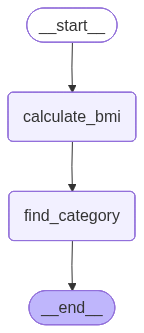

In [7]:
graph=StateGraph(BMIState)

# make the nodes of the graph
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('find_category',find_category)

# add the edges to the graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','find_category')
graph.add_edge('find_category',END)

# compile the graph
workflow=graph.compile()
workflow

In [10]:
# run the graph
initial_state={'weight':90,'height':1.75}
final_workflow=workflow.invoke(initial_state)
final_workflow

{'weight': 90,
 'height': 1.75,
 'bmi': 29.387755102040817,
 'category': 'Overweight'}